# Energy Consumption Analysis

This notebook allows you to load, analyze, and visualize consumption data from the different sources defined in the `android_runner_data` module.

In [2]:
!pip install pandas

In [1]:
import pandas as pd
from android_runner_data import BaseEnergyDataSource
from android_runner_data.plotter import DataSourcePlotter


In [6]:
import logging

# Direct definition of the experiment list
logging.getLogger("android_runner_data").setLevel(logging.INFO)
EXPERIMENTS_EXAMPLE = [
    {
        "source_type": "batterymanager",
        "data_path": "experience/data/Pixel3W/com-zhiliaoapp-musically/batterymanager"
    },
    {
        "source_type": "wattometer",
        "data_path": "experience/data/Pixel3W/com-zhiliaoapp-musically/wattometer"
    }
]
# Direct definition of the experiment list
EXPERIMENTS = [
    {
        "name": "[Sans] BM",
        "source_type": "batterymanager",
        "data_path": "experience/data/Pixel3W/com-zhiliaoapp-musically/batterymanager"
    },
    {
        "name": "[Sans] WM",
        "source_type": "wattometer",
        "data_path_global": "Resultat_campagne_Pixel3_avec_stalkerware/TikTok/output",
        "data_path": "data/Pixel3W/com-zhiliaoapp-musically/wattometer"
    }
]

# Load experiments using the static method
data_sources = BaseEnergyDataSource.load_experiments(EXPERIMENTS)

[INFO] android_runner_data: Loading data for batterymanager from experience/data/Pixel3W/com-zhiliaoapp-musically/batterymanager
[INFO] android_runner_data: Searching subfolders in Resultat_campagne_Pixel3_avec_stalkerware/TikTok/output for wattometer
[INFO] android_runner_data: Loading data for wattometer from Resultat_campagne_Pixel3_avec_stalkerware/TikTok/output\2025.07.17_084147\data/Pixel3W/com-zhiliaoapp-musically/wattometer
[INFO] android_runner_data: Searching subfolders in Resultat_campagne_Pixel3_avec_stalkerware/TikTok/output for wattometer
[INFO] android_runner_data: Loading data for wattometer from Resultat_campagne_Pixel3_avec_stalkerware/TikTok/output\2025.07.17_084147\data/Pixel3W/com-zhiliaoapp-musically/wattometer
[INFO] android_runner_data: Loading data for wattometer from Resultat_campagne_Pixel3_avec_stalkerware/TikTok/output\2025.07.17_085035\data/Pixel3W/com-zhiliaoapp-musically/wattometer
[INFO] android_runner_data: Loading data for wattometer from Resultat_cam

In [ ]:
from IPython.display import display

# Summary table
summary = []
for ds in data_sources:
    summary.append({
        "Name": ds.name,
        "Source": ds.source,
        "File": ds.data_file_name,
        "Start Time": ds.start_time,
        "Duration (s)": ds.duration_seconds,
        "Energy (Wh)": ds.energy_wh,
        "Energy (J)": ds.energy_joules,
        "Average Power (W)": ds.power_avg, 
        "Min Power (W)": ds.power_min,
        "Max Power (W)": ds.power_max,
        "Std Power (W)": ds.power_std
    })
summary_df = pd.DataFrame(summary)
display(summary_df)

# Option to display the first rows of each source
show_first_rows = False  # Set to False to not display

if show_first_rows:
    for ds in data_sources:
        print(f"\nSource: {ds.source} | File: {ds.data_file_name}")
        data = ds.get_data()
        if data is not None:
            display(data.head())
        else:
            print("No data loaded.")


,Source,File,Start Time,Duration (s),Energy (Wh),Energy (J),Average Power (W),Min Power (W),Max Power (W),Std Power (W)
0,batterymanager,logcat_10.48.244.96_5555_2025.07.10_090106.csv,2025-07-10 08:52:01,322.790,0.271200,976.318638,3.012811,1.201811,7.847541,0.821820
1,wattometer,TikTok_2025-07-17-103751.csv,2025-07-17 10:37:51,569.856,0.639851,2303.462830,4.025991,3.201000,4.067000,0.029425
2,wattometer,TikTok_2025-07-17-105046.csv,2025-07-17 10:50:46,327.316,0.363653,1309.149078,4.000298,3.918000,4.032000,0.014181
3,wattometer,TikTok_2025-07-17-110039.csv,2025-07-17 11:00:39,325.558,0.364026,1310.494105,4.014720,3.552000,4.040000,0.013478
4,wattometer,TikTok_2025-07-17-110959.csv,2025-07-17 11:09:59,327.278,0.367024,1321.287111,4.035533,3.914000,4.059000,0.013561
5,wattometer,TikTok_2025-07-17-111839.csv,2025-07-17 11:18:39,327.200,0.369239,1329.261763,4.054980,3.891000,4.078000,0.014164


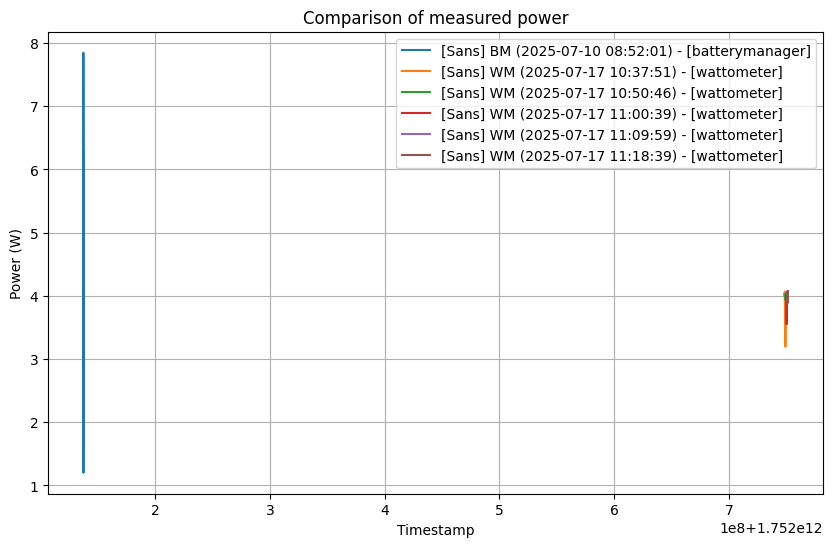

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [8]:
# Plot the power of all sources
plotter = DataSourcePlotter(data_sources)
plotter.plot_power(title="Comparison of measured power")
